<a href="https://colab.research.google.com/github/Sahilpardeshi1/Hotel_booking_EDA/blob/main/Hotel_Booking_Analysis_EDA_Capstone_Projectby_sahil_pardeshi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate?what if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special request? This hotel booking dataset can you to explore those question!

##<b> This dataset contain booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, &/or babies, and the number of available parking spaces, among the other things. All the personally identifying information has been removed from the data. </b>

## <b> Explore and the analyze the data to discover important factors that govern bookings. </b>

# **EDA on Hotel booking Datasets**

**The current project is exploratory data analysis performed on hotel booking dataset. This is first project of my data science journey . I Hope you all like it! 
So let's begins with the analysis**

In [1]:
#importing required libraries

import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
#Mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path ='/content/drive/MyDrive/ datasets/Hotel Bookings.csv'

In [3]:
#Loading the csv File

df = pd.read_csv(path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape #looking at the shape of dataset

(119390, 32)

In [ ]:
df.info() #check the datatypes of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0

In [ ]:
df.distribution_channel

0            Direct
1            Direct
2            Direct
3         Corporate
4             TA/TO
            ...    
119385        TA/TO
119386        TA/TO
119387        TA/TO
119388        TA/TO
119389        TA/TO
Name: distribution_channel, Length: 119390, dtype: object

In [ ]:
#lets count how many nan or Null values we have 
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

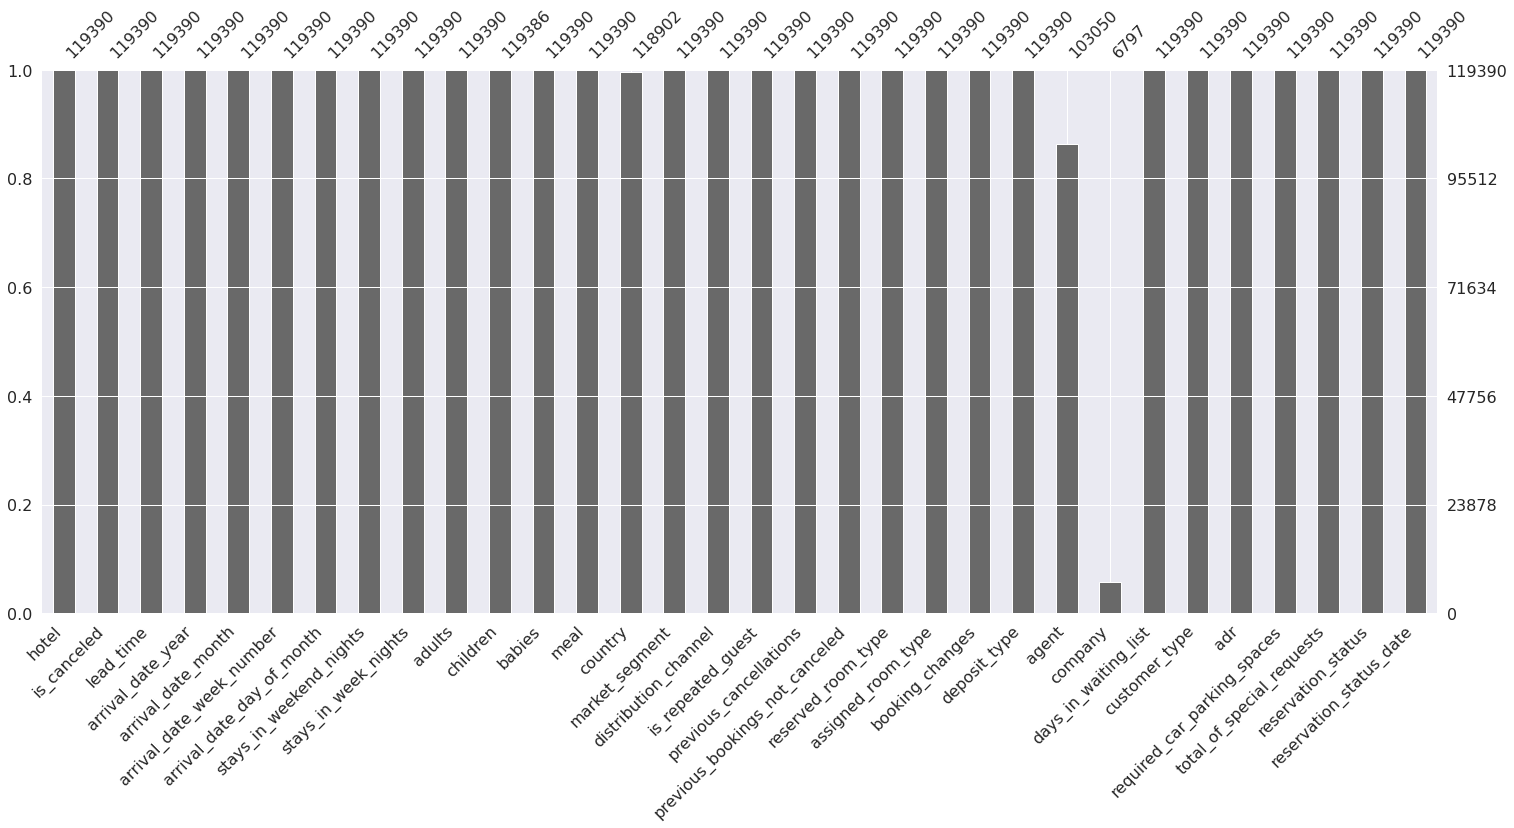

In [ ]:
#visualize missing data 
import missingno as msno#this library shows the null values in the graph 
msno.bar(df)

##<b> The columns "agent" and "company" have high number of missing values. As these columns wont't be relevant for our analysis, we can drop them.</b>

In [ ]:
df=df.drop(['agent','company'],axis=1)

In [ ]:
df=df.drop(labels='days_in_waiting_list',axis=1)#The columns "days_in_waiting_list" is not relevant in our analysis. so we drop it.

In [ ]:
#check to see if there are any more Nan values
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

<b> Perfect! the dataframe of hotel has no missing values.</b>

In [ ]:
df.describe()#statistical aspect of the dataframe

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<b> Since there are two types of hotel(resort or city),we can simply use the bar chart or a pie chart to show.</b>

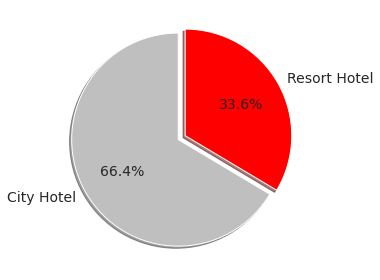

In [ ]:
labels = df['hotel'].value_counts().index.tolist() #Indexing labels.tolist() will convert the index to list for each manipulation
sizes = df['hotel'].value_counts().tolist() #Convert value counts to list
explode = (0,0.075) # It determine how much each section is seperated from each other
colors = ["0.75","red"] #Determine the color of pie chart


plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90,textprops={'fontsize': 14})
plt.tight_layout()
plt.show()

** We can see the above pic pie chart, that the majority of people preferred city hotel over resort hotel.**

In [ ]:
#Now lets check the canceled booking.
print('total booking canceled')
print(df.is_canceled.value_counts())
print('canceled percentage')
print(df.is_canceled.value_counts(normalize=True))


total booking canceled
0    75166
1    44224
Name: is_canceled, dtype: int64
canceled percentage
0    0.629584
1    0.370416
Name: is_canceled, dtype: float64


**During the year we have 37.13% of calcellations.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


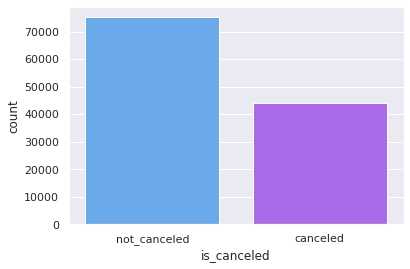

In [ ]:
#Now lets plot this result
df['is_canceled'] = df.is_canceled.replace([1,0],['canceled','not_canceled'])
canceled_data = df['is_canceled']
sns.set_theme(style="darkgrid")
sns.countplot(canceled_data,palette="cool")

**It seems that mojority of booking is not cancelled**

<bound method Artist.set of Text(0.5, 1.0, 'cancellation rates in city and resort hotel')>

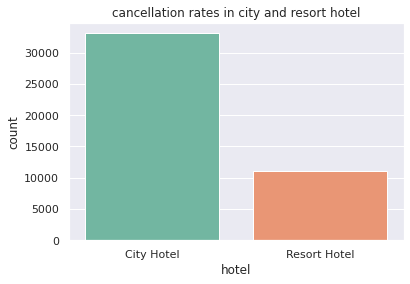

In [ ]:
#Let's look into cancellation rate among different types of hotel
lst1 = ['is_canceled','hotel']
type_of_hotel_canceled = df[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.set_theme(style="darkgrid")
sns.barplot(data = canceled_hotel, x = 'hotel',y = 'count',palette="Set2").set_title('cancellation rates in city and resort hotel').set

**City hotel has highest calcellation rates, this can be verified by the fact that the city hotels has highest booking rates than resort hotels.**

**overview of arrival periods**

In [ ]:
df.arrival_date_year.value_counts(normalize=True)#arrival period in year

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


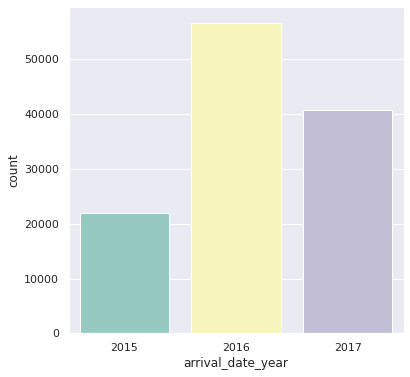

In [ ]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(df['arrival_date_year'],palette='Set3')
plt.show()

**I can see that 2016 seems to be the year where hotel booking is at its highest**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


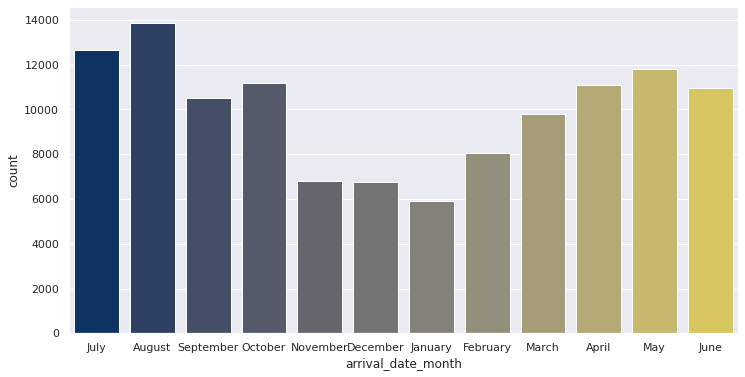

In [ ]:
#Arrival period in month
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.countplot(df['arrival_date_month'],palette="cividis")
plt.show()

**Increasing in booking on august being is highest.summer ends arounds august, it seems that the summer period is peak periods for hotel bookings.**

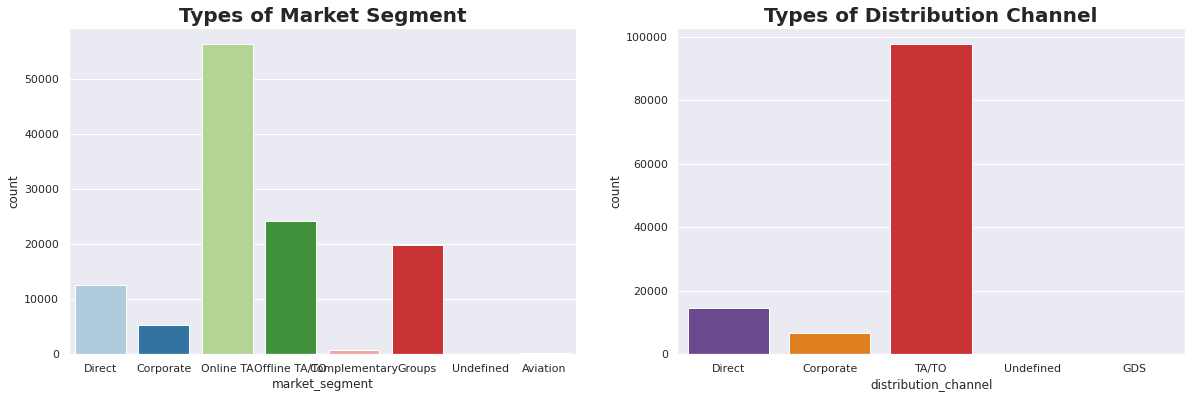

In [ ]:
#Lets check the market segment designation
#In categories the term "TA" means "Travel Agents" and "TO" means "Tour Operators"
plt.figure(figsize=(20,6))                                                         
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.countplot(x='market_segment',data=df,palette='Paired')
plt.title('Types of Market Segment',fontweight="bold",size=20)

plt.subplot(1,2,2)
sns.set_theme(style="darkgrid")
sns.countplot(data=df,x='distribution_channel',palette='Paired_r')
plt.title('Types of Distribution Channel',fontweight="bold",size=20)
plt.show()

**Majority of booking were made through online travel agents and travel agents were wheather online/offline have the highest distribution rates.**

#Meals

* **underfined/SC--->no meal packages;**
* **BB--->Bed & Breakfast**
* **HB--->Halfboard(breakfast and one other meal ---usually dinner);**
* **FB--->fullboard(breakfast, lunch & dinner)**

In [ ]:
#Types of meak booked
df.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


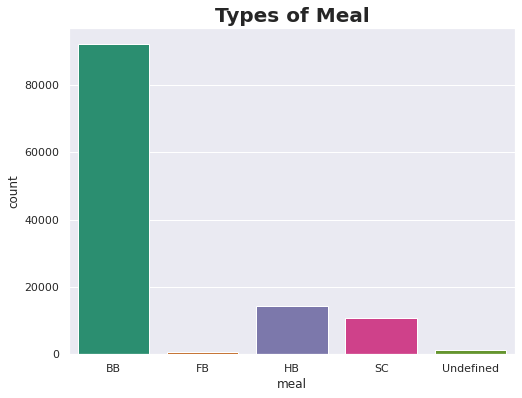

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['meal'],palette='Dark2')
sns.set_theme(style="darkgrid")
plt.title('Types of Meal',fontweight="bold",size=20)
plt.show()

**High percentage is of BB is 77.26%. THe BB is most favorite meal for the people**

In [ ]:
df.reserved_room_type.value_counts(normalize=True)

A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


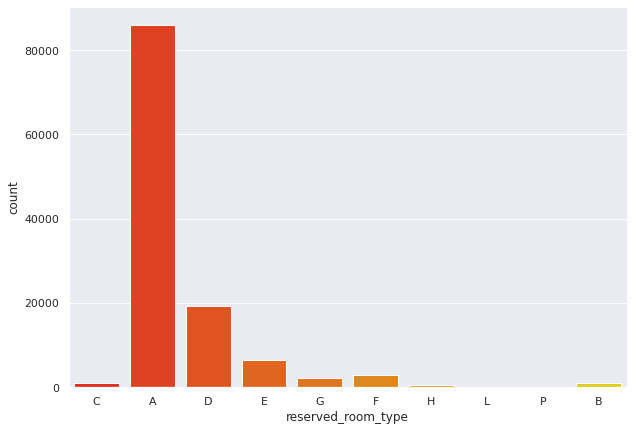

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
sns.countplot(df['reserved_room_type'],palette='autumn')
plt.show()

**The type "A" is reserved by the most the clients, with 71.99%of the reservation**

## Overview of the repeated guest
 Check if the booking name was from a repeated guest(1) or not(0)

In [ ]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

In [ ]:
df.is_repeated_guest

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_repeated_guest, Length: 119390, dtype: int64

* **Low number of repeated guest**
* **A need to target repeated guest since they have booked before**

#Overview of customer type 

* **contract--->When the booking has an alotment or other type of contract associated to it;**
* **Group--->When the booking is associated to the group;**
* **Transient--->When the booking is not part of a group or contract, is not associated to other transient booking;**
* **Transient-party--->When the booking is transient, but is associated to atleast other transient party**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


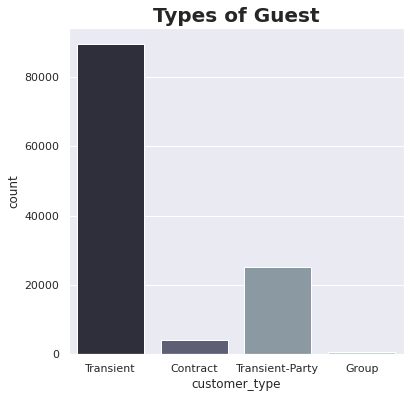

In [ ]:
#Looking at types of guests
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(df['customer_type'],palette='bone')
plt.title('Types of Guest',fontweight="bold",size=20)

plt.show()

<b>Majority of the booking are transient. This means that the booking is not a group or contact.With the ease of directly from the website,most people tends to skip the middlemen to ensure quick response from their booking.</b>

In [ ]:
#looking into deposit types
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

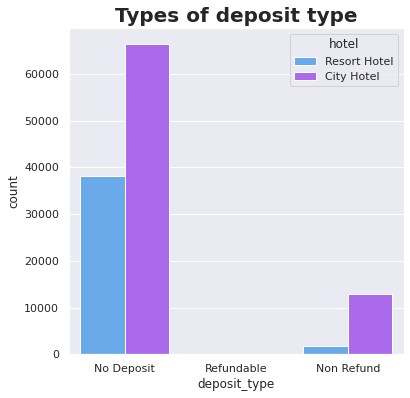

In [ ]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(data= df,x='deposit_type',hue='hotel',palette='cool')
plt.title('Types of deposit type',fontweight="bold",size=20)
plt.show()

<b> Majority of the booking don't have a deposit towards it.</b>

In [ ]:
#looking fo car parking spaces
df.required_car_parking_spaces.value_counts(normalize=True)

0    0.937884
1    0.061839
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

In [ ]:
df.required_car_parking_spaces.sum()

7464

<b>7464 car parking spaces have been used. </b>

# Reservation status 

* **canceled--->booking was canceled by the customer**
* **Check-out--->customer has checkin but it already departed;**
* **No-show--->customer did not check -in and did inform the hotel of the reason why**

In [ ]:
df.reservation_status.value_counts(normalize=True)

Check-Out    0.629584
Canceled     0.360307
No-Show      0.010110
Name: reservation_status, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


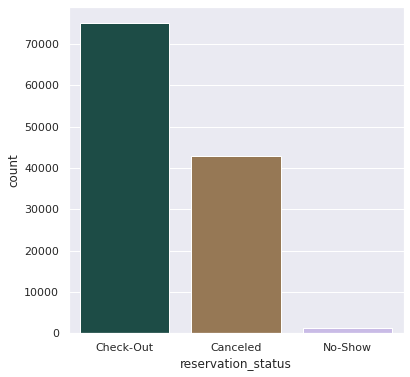

In [ ]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(df['reservation_status'],palette='cubehelix')
plt.show()

In [ ]:
#Here we see how many special request has been done by the customers.
df.total_of_special_requests.value_counts(normalize=True)

0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

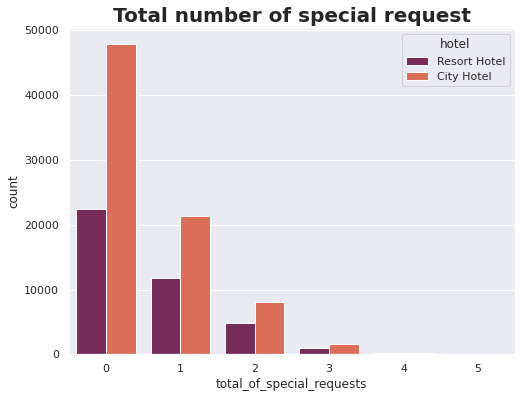

In [ ]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(data= df,x='total_of_special_requests',hue='hotel',palette='rocket')
plt.title('Total number of special request',fontweight="bold",size=20)
plt.show()

**Here in this above plot we see the special request to the customer is not very much higher in both the hotels but city hotel is little more special hotel as compared to resort hotel.**

In [ ]:
#let's see whether the stay is over weekend or weekday.
df.stays_in_weekend_nights.value_counts(normalize=True)

0     0.435531
2     0.278985
1     0.256521
4     0.015537
3     0.010545
6     0.001282
5     0.000662
8     0.000503
7     0.000159
9     0.000092
10    0.000059
12    0.000042
13    0.000025
16    0.000025
14    0.000017
18    0.000008
19    0.000008
Name: stays_in_weekend_nights, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


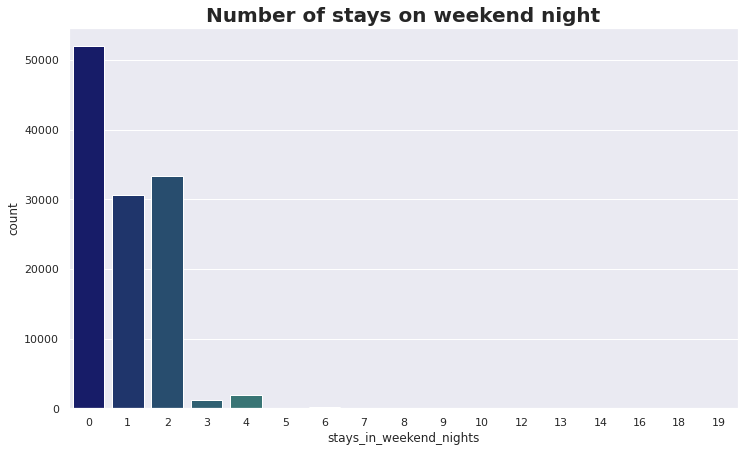

In [ ]:
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
sns.countplot(df['stays_in_weekend_nights'],palette='gist_earth')
plt.title('Number of stays on weekend night',fontweight="bold",size=20)
plt.show()

In [ ]:
df.stays_in_week_nights.value_counts(normalize=True)

2     0.282134
1     0.253874
3     0.186431
5     0.092780
4     0.080099
0     0.064034
6     0.012555
10    0.008677
7     0.008619
8     0.005495
9     0.001935
15    0.000712
11    0.000469
19    0.000369
12    0.000352
20    0.000343
14    0.000293
13    0.000226
16    0.000134
21    0.000126
22    0.000059
18    0.000050
25    0.000050
30    0.000042
17    0.000034
24    0.000025
40    0.000017
42    0.000008
26    0.000008
32    0.000008
33    0.000008
34    0.000008
35    0.000008
41    0.000008
50    0.000008
Name: stays_in_week_nights, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


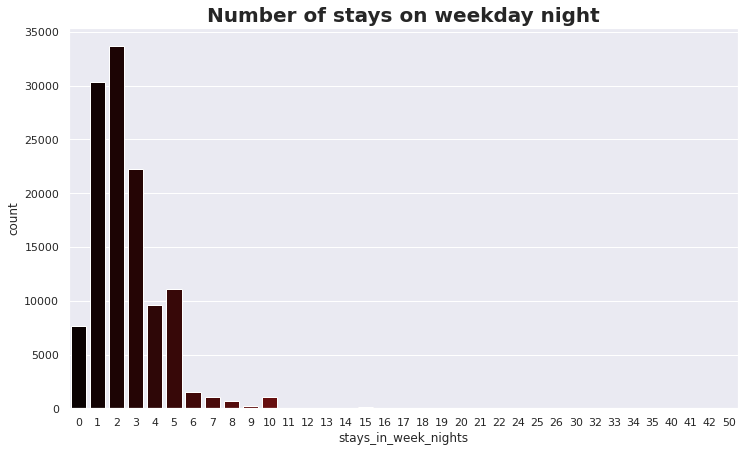

In [ ]:
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
sns.countplot(df['stays_in_week_nights'],palette='gist_heat')
plt.title('Number of stays on weekday night',fontweight="bold",size=20)
plt.show()

## Types of visitors

In [ ]:
df.adults.value_counts(normalize=True)

2     0.751152
1     0.192872
3     0.051947
0     0.003375
4     0.000519
26    0.000042
27    0.000017
20    0.000017
5     0.000017
55    0.000008
50    0.000008
40    0.000008
10    0.000008
6     0.000008
Name: adults, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


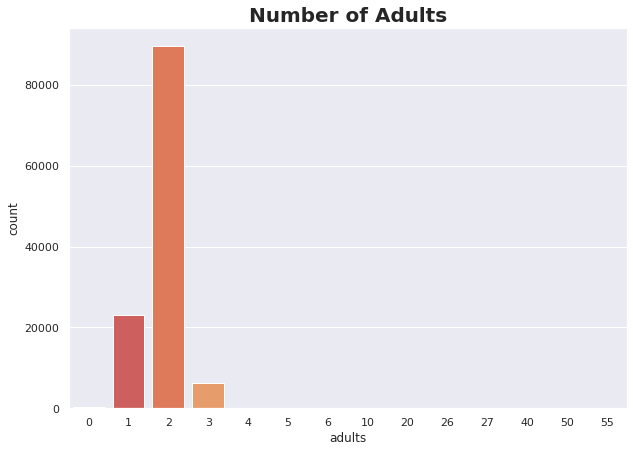

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
sns.countplot(df['adults'],palette='Spectral')
plt.title('Number of Adults',fontweight="bold",size=20)
plt.show()

In [ ]:
df.children.value_counts(normalize=True)

0.0     0.928049
1.0     0.040717
2.0     0.030590
3.0     0.000637
10.0    0.000008
Name: children, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


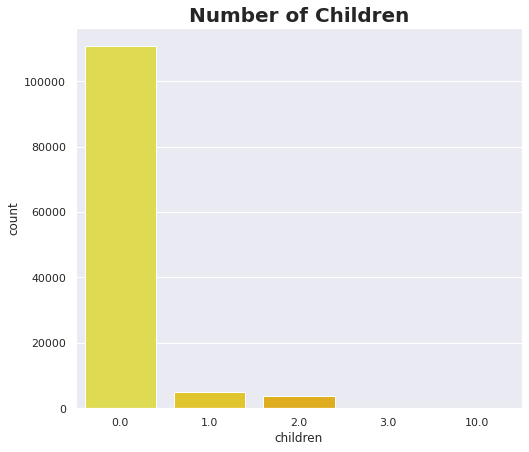

In [ ]:
plt.figure(figsize=(8,7))
sns.set_theme(style="darkgrid")
sns.countplot(df['children'],palette='Wistia')
plt.title('Number of Children',fontweight="bold",size=20)
plt.show()

## **Which countries the visitors are from**

**We will want visitors with "no cancellation"**

In [ ]:
country_visitors = df[df['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

import plotly.express as px #WE will be using plotly.express to plot a choropleth map

px.choropleth(country_visitors,locations = "country",color = "count",hover_name="country",#This colomn tells the information of the country when we hover in the plot
              color_continuous_scale="viridis",title="Home country of visitors")

* **We see huge number of visitors from western europe**
* **We can target people of this region for promotion or marketing**


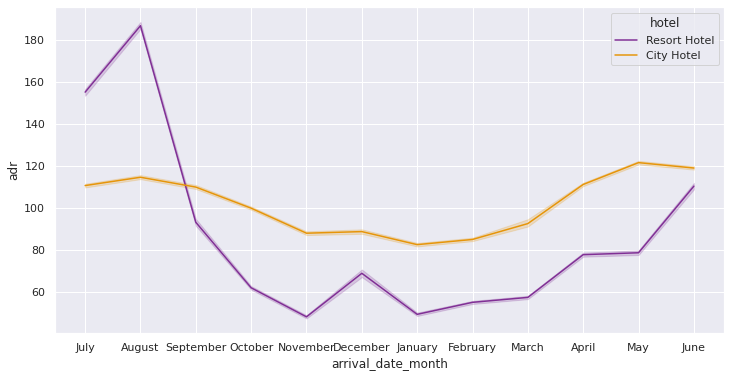

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=df,palette='CMRmap')
plt.show()

* **For resort hotels,the average daily rate is more expensive during august,july and september.**
* **For city hotels,the average daily rate is more expensive during august,july,june and may.**

## **Asking and Answering Questions**

**Q1:Which month is the most occupied and which is least occupied?**

In [ ]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64

**August is the most occupied month with 11.65% bookings and january is the least occupied month with 4.94% bookings in the year.**

**Q2:Which month have cheaper booking rate?**

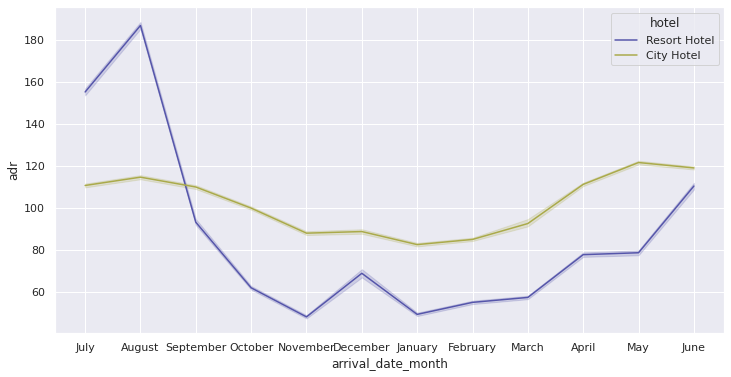

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=df,palette='gist_stern')
plt.show()

**For both city and resort hotels,November to January have cheaper average daily rates**

**Q3:Which country should be targetted for promotion?**

In [ ]:
print("Countries targetted for promotion")
print(df.country.value_counts().head(5))
print('-'*50)
print("Countries not targetted for promotion")
print(df.country.value_counts().tail(5))

Countries targetted for promotion
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64
--------------------------------------------------
Countries not targetted for promotion
HND    1
LCA    1
CYM    1
VGB    1
UMI    1
Name: country, dtype: int64


**More visitors are from western europe,namely Portugal,France,Great Britain,and Spain being the highest and suit for the promotion.
The countries with only 1 guest are not suitable for promotion,countries like we have Madagascar,Dominicia,Mali,and Guyana,etc.**

**Q4:Numbers of customers repeated their bookings.**

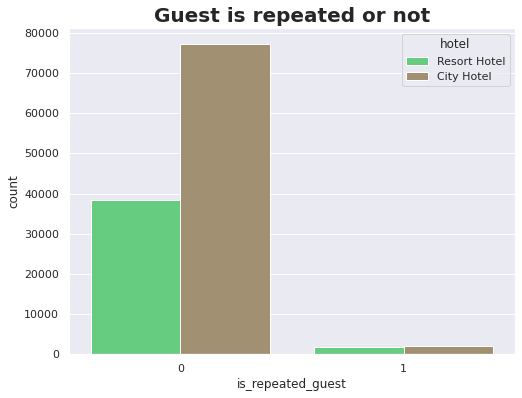

In [ ]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(data= df,x='is_repeated_guest',hue='hotel',palette='terrain')
plt.title( 'Guest is repeated or not',fontweight="bold",size=20)
plt.show() # 0 = No , 1 = yes ,in the graph

**Most customers are not repeating their booking.**

**Q5:What is the most common customer type?**

In [ ]:
df.customer_type.value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

**Transiet are the most common customer type,they represent 75% of the total customers.**

**Q6:How many bookings changes have been done during the studied period?**

In [ ]:
df.booking_changes.sum()

26400

**There were 25,829 registered changes in the bookings during this period**

**Q7.What is the average daily rate of both the hotel type.**

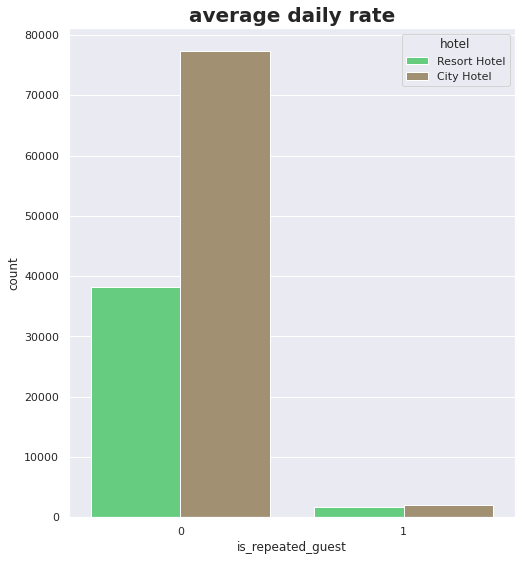

In [ ]:
df.arrival_date_week_number
plt.figure(figsize=(8,9))
sns.set_theme(style="darkgrid")
sns.countplot(data= df,x='is_repeated_guest',hue='hotel',palette='terrain')
plt.title( 'average daily rate',fontweight="bold",size=20)
plt.show() # 0 = No , 1 = yes ,in the graph


**Q8.Was there any type of deposit before booking a hotel.**

In [ ]:
df.deposit_type

0         No Deposit
1         No Deposit
2         No Deposit
3         No Deposit
4         No Deposit
             ...    
119385    No Deposit
119386    No Deposit
119387    No Deposit
119388    No Deposit
119389    No Deposit
Name: deposit_type, Length: 119390, dtype: object

**Q9.What percentage of bookings are made online.**

In [ ]:
df.booking_changes.sum()

26400

**Q10.From Which country most guests comes.**

In [ ]:
df.country
country_visitors = df[df['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

import plotly.express as px #WE will be using plotly.express to plot a choropleth map

px.choropleth(country_visitors,locations = "country",color = "count",hover_name="country",#This colomn tells the information of the country when we hover in the plot
              color_continuous_scale="blackbody",title="Home country of visitors")

# **Inferences and Conclusion**

* **Majority of the hotels booked are city hotel.**
* **Majority of the guests are from Western Europe.So target this area for more customers.**
* **2016 showed the highest rate of hotel bookings.(data from 2015-2017)**

* **We should also target months between May to Aug.Those are peak months due to the summer period.**
* **No deposit policies lead to a higher cancellation rates.**

* **Since there are very few repeated guests,focus should be on retaining the customers after their first visit.**
* **The majority of reservations converts into successful transactions.**

* **More bookings occured on weekdays vs weekends.**
* **Most bookings came from independent,transient customers.**
* **Most guest are from Western European countries like portugal,spain, UK and france.**
* **Bed and Breakfast(BB) is the most famous type of meal.**

### **All done with my first EDA project on 'Hotel booking dataset'.Me and my team members have done every kind of work that has been required in this project,whatever I learned in python with the help of 'almabetter' and every instructor in almabetter taught us I mentioned it in this project.Hope you all like it,and also i would like to thank 'almabetter' for giving this opportunity to me..I hope you all like it this project.**

#                                 **!THANK YOU!**